<a href="https://colab.research.google.com/github/dlwltn0430/tusimple-demo/blob/main/tusimple_lane_detection_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d manideep1108/tusimple

Dataset URL: https://www.kaggle.com/datasets/manideep1108/tusimple
License(s): copyright-authors
100% 21.6G/21.6G [05:14<00:00, 55.9MB/s]
100% 21.6G/21.6G [05:14<00:00, 74.0MB/s]


In [2]:
!unzip tusimple.zip -d /content/tusimple/

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/115/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/1150/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/11520/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/1155/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/11580/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/1160/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/11640/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/1165/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/1170/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/11700/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/1175/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/117

In [6]:
!git clone https://github.com/TuSimple/tusimple-benchmark.git

fatal: destination path 'tusimple-benchmark' already exists and is not an empty directory.


In [7]:
import sys
sys.path.append('/content/tusimple-benchmark')  # 'evaluate' 폴더가 위치한 경로를 지정

In [9]:
!sed -i 's/print /print(/g' /content/tusimple-benchmark/evaluate/lane.py
!sed -i 's/print(/print(/g' /content/tusimple-benchmark/evaluate/lane.py
!sed -i 's/)\n/) \n/g' /content/tusimple-benchmark/evaluate/lane.py

In [13]:
import re

# 파일 경로 설정
file_path = '/content/tusimple-benchmark/evaluate/lane.py'

# 파일을 읽고, 변환하고, 다시 쓰기
with open(file_path, 'r') as file:
    code = file.read()

# print 문 변환
code = re.sub(r'print\s+(.*)', r'print(\1)', code)

# except 문 변환
code = re.sub(r'except\s+(\w+),\s*(\w+):', r'except \1 as \2:', code)

# 변환된 코드를 다시 파일에 쓰기
with open(file_path, 'w') as file:
    file.write(code)

print("Python 3 변환 완료")

Python 3 변환 완료


In [16]:
!pip install ujson

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.8 MB/s eta 0:00:00


In [17]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from evaluate.lane import LaneEval
%matplotlib inline

In [29]:
# json_pred = [json.loads(line) for line in open('pred.json').readlines()]
with open('pred.json', 'r') as pred_file:
    json_pred = json.load(pred_file)

# json_gt = [json.loads(line) for line in open('label_data.json')]
json_gt = []
with open('tusimple/TUSimple/train_set/label_data_0531.json', 'r') as gt_file:
    for line in gt_file:
        json_gt.append(json.loads(line))

In [31]:
print(type(json_pred))
print(json_pred)

print(type(json_gt))
print(json_gt)


<class 'dict'>
{'lanes': [[120, 130, -2, -2], [220, 230, 240, 250]], 'run_time': 50.5, 'raw_file': 'clips/0531/1492627050000000000_0.jpg'}
<class 'list'>
[{'lanes': [[-2, -2, -2, -2, -2, -2, -2, -2, 499, 484, 470, 453, 435, 418, 400, 374, 346, 318, 290, 262, 235, 207, 179, 151, 123, 96, 68, 40, 12, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2], [-2, -2, -2, -2, -2, -2, -2, -2, -2, 529, 531, 533, 536, 538, 540, 540, 538, 536, 531, 525, 519, 513, 507, 499, 491, 483, 475, 467, 459, 451, 443, 435, 426, 418, 410, 402, 394, 386, 378, 370, 362, 354, 346, 338, 330, 322, 314, 306, 297, 289, 281, 273, 265, 257, 249, 241], [-2, -2, -2, -2, -2, -2, -2, -2, 553, 568, 583, 598, 613, 640, 667, 693, 719, 740, 761, 783, 804, 825, 846, 868, 883, 897, 912, 926, 941, 955, 969, 984, 998, 1013, 1027, 1042, 1056, 1070, 1085, 1099, 1114, 1128, 1143, 1157, 1171, 1186, 1200, 1215, 1229, 1244, 1258, 1272, -2, -2, -2, -2], [-2, -2, -2, -2, -2, -2, -2, 

In [35]:
# pred, gt = json_pred[0], json_gt[0]
pred = json_pred
gt = json_gt[0]

pred_lanes = pred['lanes']
run_time = pred['run_time']
gt_lanes = gt['lanes']
y_samples = gt['h_samples']
raw_file = gt['raw_file']

In [41]:
print(raw_file)  # 파일 경로 확인

import os

# raw_file이 잘못된 경로로 설정된 경우, 올바른 경로로 수정
raw_file = os.path.join('/content/tusimple/TUSimple/train_set', os.path.relpath(raw_file, '/content'))
print(raw_file)

/content/clips/0531/1492626287507231547/20.jpg
/content/tusimple/TUSimple/train_set/clips/0531/1492626287507231547/20.jpg


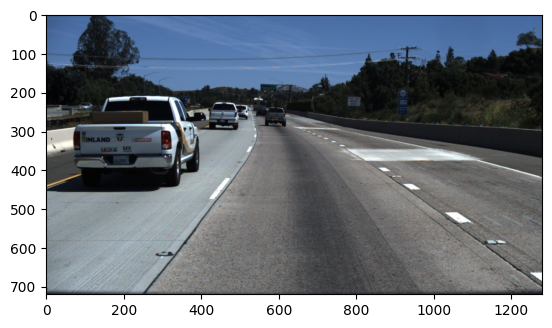

In [42]:
img = plt.imread(raw_file)
plt.imshow(img)
plt.show()

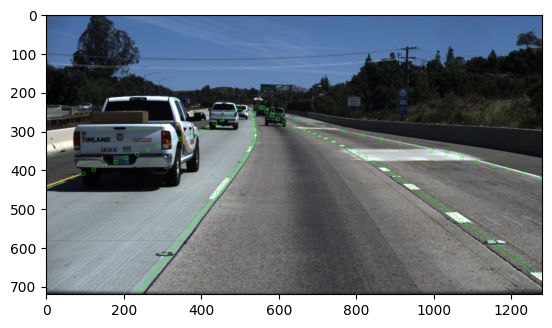

In [43]:
gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
img_vis = img.copy()

for lane in gt_lanes_vis:
    for pt in lane:
        cv2.circle(img_vis, pt, radius=5, color=(0, 255, 0))

plt.imshow(img_vis)
plt.show()

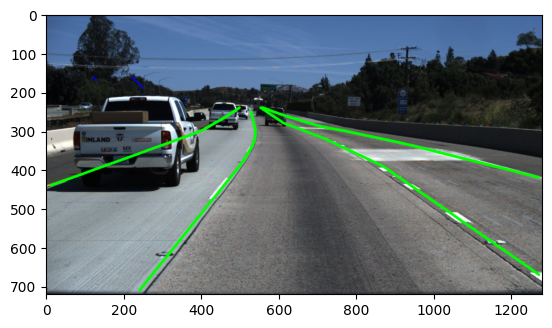

In [44]:
gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
pred_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in pred_lanes]
img_vis = img.copy()

for lane in gt_lanes_vis:
    cv2.polylines(img_vis, np.int32([lane]), isClosed=False, color=(0,255,0), thickness=5)
for lane in pred_lanes_vis:
    cv2.polylines(img_vis, np.int32([lane]), isClosed=False, color=(0,0,255), thickness=2)

plt.imshow(img_vis)
plt.show()

In [ ]:
# 차선 정확도 평가
np.random.shuffle(pred_lanes)
# Overall Accuracy, False Positive Rate, False Negative Rate
print(LaneEval.bench(pred_lanes, gt_lanes, y_samples, run_time))